# Análise de Erro

## Submission anterior resultou numa acurácia de 0.74 o que não foi uma melhora

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp' , 'Parch', 'Fare']

In [3]:
def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0
#usando map() para aplicar linha a linha na coluna selecionada

train['Sex_binario'] = train['Sex'].map(transformar_sexo)
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

In [4]:
X = train[variaveis].fillna(-1)
y = train['Survived']

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold

In [25]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    #print("Treino:",linhas_treino.shape[0])
    #print("Valid:",linhas_valid.shape[0])
    #print()

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(X_treino,y_treino)

    p = modelo.predict(X_valid)
    acc = np.mean(y_valid == p)

    resultados.append(acc)

    #print("Acc:", acc)
    #print()


In [26]:
# Acurácia média

np.mean(resultados2)

0.8050486219579784

(array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
 array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
        0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
        0.83856502]),
 <BarContainer object of 10 artists>)

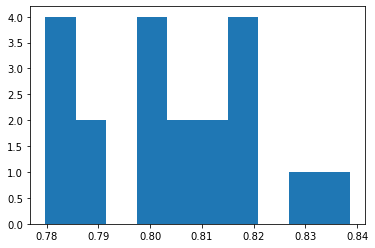

In [47]:
# histograma de resultados
pylab.hist(resultados)

#### Usar esse novo df para analisar onde o modelo está errando as previsões

In [27]:
X_valid_check = train.iloc[linhas_valid].copy()
X_valid_check['p'] = p
X_valid_check.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_S,Embarked_C,Cabine_nula,Nome_contem_Miss,Nome_contem_Mrs,Nome_contem_Master,Nome_contem_Col,Nome_contem_Major,Nome_contem_Mr,p
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,1,0,0,0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,1,1,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,0,1,0,0,0,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,0,1,0


In [28]:
erros = X_valid_check[X_valid_check['Survived']!=X_valid_check['p']]

In [29]:
erros = erros[['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Sex_binario','p','Survived']]
erros.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
21,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,0,1
22,23,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,1,0,1
23,24,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0,0,1
25,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,1,0,1


#### Procurar erros entre grupos específicos

In [30]:
mulheres = erros[erros['Sex'] == 'female']
homens = erros[erros['Sex'] == 'male' ]

In [31]:
mulheres.sort_values('Survived')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
415,416,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S,1,1,0
854,855,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S,1,1,0
852,853,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C,1,1,0
772,773,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S,1,1,0
736,737,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S,1,1,0
678,679,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S,1,1,0
654,655,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q,1,1,0
593,594,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q,1,1,0
502,503,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q,1,1,0
501,502,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q,1,1,0


In [32]:
homens.sort_values('Survived')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
452,453,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C111,C,0,1,0
757,758,2,"Bailey, Mr. Percy Andrew",male,18.0,0,0,29108,11.5000,NaN,S,0,1,0
749,750,3,"Connaghton, Mr. Michael",male,31.0,0,0,335097,7.7500,NaN,Q,0,1,0
745,746,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,0,1,0
698,699,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C,0,1,0
671,672,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,0,1,0
544,545,1,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.4250,C86,C,0,1,0
442,443,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,347076,7.7750,NaN,S,0,1,0
238,239,2,"Pengelly, Mr. Frederick William",male,19.0,0,0,28665,10.5000,NaN,S,0,1,0
169,170,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,0,1,0


## Novas Variáveis

In [33]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
#train['Embarked_C'] = (train['Embarked'] == 'Q').astype(int)


train['Cabine_nula'] = (train['Cabin'].isnull()).astype(int)

train['Nome_contem_Miss'] = (train['Name'].str.contains('Miss')).astype(int)
train['Nome_contem_Mrs'] = (train['Name'].str.contains('Mrs')).astype(int)
train['Nome_contem_Master'] = (train['Name'].str.contains('Master')).astype(int)
train['Nome_contem_Col'] = (train['Name'].str.contains('Col')).astype(int)
train['Nome_contem_Major'] = (train['Name'].str.contains('Major')).astype(int)
train['Nome_contem_Mr'] = (train['Name'].str.contains('Mr')).astype(int)

In [34]:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp' , 'Parch', 'Fare','Embarked_S','Embarked_C',
            'Cabine_nula','Nome_contem_Miss','Nome_contem_Mrs','Nome_contem_Master','Nome_contem_Col',
             'Nome_contem_Major','Nome_contem_Mr']


X = train[variaveis].fillna(-1)
y = train['Survived']

In [35]:
resultados2 = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    #print("Treino:",linhas_treino.shape[0])
    #print("Valid:",linhas_valid.shape[0])
    #print()

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(X_treino,y_treino)

    p = modelo.predict(X_valid)
    acc = np.mean(y_valid == p)

    resultados2.append(acc)

    #print("Acc:", acc)
    #print()


In [36]:
# Acurácia média

np.mean(resultados2)

0.8050486219579784

((array([1., 0., 1., 2., 0., 4., 5., 3., 1., 3.]),
  array([0.7690583 , 0.77488789, 0.78071749, 0.78654709, 0.79237668,
         0.79820628, 0.80403587, 0.80986547, 0.81569507, 0.82152466,
         0.82735426]),
  <BarContainer object of 10 artists>),
 (array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
  array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
         0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
         0.83856502]),
  <BarContainer object of 10 artists>))

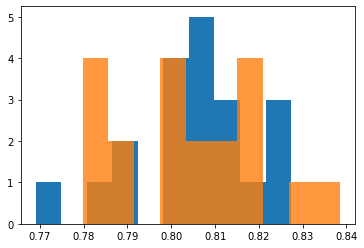

In [24]:
pylab.hist(resultados2),pylab.hist(resultados,alpha=0.8)

## Aplicar no modelo e ver se surte efeito na leaderboard 

In [37]:
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
#test['Embarked_C'] = (test['Embarked'] == 'Q').astype(int)


test['Cabine_nula'] = (test['Cabin'].isnull()).astype(int)

test['Nome_contem_Miss'] = (test['Name'].str.contains('Miss')).astype(int)
test['Nome_contem_Mrs'] = (test['Name'].str.contains('Mrs')).astype(int)
test['Nome_contem_Master'] = (test['Name'].str.contains('Master')).astype(int)
test['Nome_contem_Col'] = (test['Name'].str.contains('Col')).astype(int)
test['Nome_contem_Major'] = (test['Name'].str.contains('Major')).astype(int)
test['Nome_contem_Mr'] = (test['Name'].str.contains('Mr')).astype(int)

In [39]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(X,y)

p = modelo.predict(test[variaveis].fillna(-1))

### Resultado Permaneceu o mesmo na leaderboard 
#### Para resolver esse problema tentaremos utilizar uma regressão logística

In [43]:
from sklearn.linear_model import LogisticRegression

In [ ]:
resultados2 = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    #print("Treino:",linhas_treino.shape[0])
    #print("Valid:",linhas_valid.shape[0])
    #print()

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(X_treino,y_treino)

    p = modelo.predict(X_valid)
    acc = np.mean(y_valid == p)

    resultados2.append(acc)

    #print("Acc:", acc)
    #print()


In [ ]:
np.mean(resultados2)

In [ ]:
pylab.hist(resultados2),pylab.hist(resultados,alpha=0.8)

In [ ]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(X,y)

p = modelo.predict(test[variaveis].fillna(-1))

In [45]:
?LogisticRegression

## Criar Submission

In [40]:
sub = pd.Series(p, index=test['PassengerId'], name ='Survived')

In [41]:
sub.to_csv('Modelo Final MF.csv',header=True)

In [42]:
with open("Modelo Final MF.csv") as f:
    for _ in range(10): # first 10 lines
        print(f.readline())

PassengerId,Survived

892,0

893,0

894,0

895,1

896,0

897,0

898,0

899,0

900,1

